In [75]:
import sympy as sp

In [76]:
x, y, z = sp.symbols('x y z', real=True)
r = sp.symbols('r', real=True, positive=True)
theta, phi = sp.symbols('theta, phi', real=True)
M = sp.symbols('M', real=True)

In [77]:
g_ij_sph = sp.Matrix([[1/(1-1/r),0,0],
                      [0,sp.Pow(r,2),0],
                      [0,0,sp.Pow(r,2)*sp.sin(theta)]])
g_ij_sph

Matrix([
[1/(1 - 1/r),    0,               0],
[          0, r**2,               0],
[          0,    0, r**2*sin(theta)]])

In [78]:
r_cart = sp.sqrt((2*x)**2+(2*y)**2+(2*z)**2)
theta_cart = sp.acos(z/r_cart)
phi_cart = sp.atan2(y,x)

In [79]:
xyz = sp.Matrix([[r*sp.sin(theta)*sp.cos(phi)],[r*sp.sin(theta)*sp.sin(phi)],[r*sp.cos(theta)]])
d = sp.Matrix([[r, theta, phi]])

Lambda = sp.simplify(xyz.jacobian(d))

Lambda = Lambda.subs(r, r_cart)
Lambda = Lambda.subs(theta, theta_cart)
Lambda = sp.simplify(Lambda.subs(phi, phi_cart))
Lambda

Matrix([
[x*sqrt(4*x**2 + 4*y**2 + 3*z**2)/(2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)),           x*z/sqrt(x**2 + y**2), -y*sqrt(4*x**2 + 4*y**2 + 3*z**2)/sqrt(x**2 + y**2)],
[y*sqrt(4*x**2 + 4*y**2 + 3*z**2)/(2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)),           y*z/sqrt(x**2 + y**2),  x*sqrt(4*x**2 + 4*y**2 + 3*z**2)/sqrt(x**2 + y**2)],
[                                                              z/(2*sqrt(x**2 + y**2 + z**2)), -sqrt(4*x**2 + 4*y**2 + 3*z**2),                                                   0]])

In [80]:
gamma = sp.simplify(sp.det(Lambda))
gamma

(4*x**4*sqrt(4*x**4 + 8*x**2*y**2 + 7*x**2*z**2 + 4*y**4 + 7*y**2*z**2 + 3*z**4) + 8*x**2*y**2*sqrt(4*x**4 + 8*x**2*y**2 + 7*x**2*z**2 + 4*y**4 + 7*y**2*z**2 + 3*z**4) + 3*x**2*z**2*sqrt(4*x**4 + 8*x**2*y**2 + 7*x**2*z**2 + 4*y**4 + 7*y**2*z**2 + 3*z**4) + 4*y**4*sqrt(4*x**4 + 8*x**2*y**2 + 7*x**2*z**2 + 4*y**4 + 7*y**2*z**2 + 3*z**4) + 3*y**2*z**2*sqrt(4*x**4 + 8*x**2*y**2 + 7*x**2*z**2 + 4*y**4 + 7*y**2*z**2 + 3*z**4) + z**2*sqrt(4*x**8 + 16*x**6*y**2 + 7*x**6*z**2 + 24*x**4*y**4 + 21*x**4*y**2*z**2 + 3*x**4*z**4 + 16*x**2*y**6 + 21*x**2*y**4*z**2 + 6*x**2*y**2*z**4 + 4*y**8 + 7*y**6*z**2 + 3*y**4*z**4))/(2*sqrt(x**8 + 4*x**6*y**2 + 2*x**6*z**2 + 6*x**4*y**4 + 6*x**4*y**2*z**2 + x**4*z**4 + 4*x**2*y**6 + 6*x**2*y**4*z**2 + 2*x**2*y**2*z**4 + y**8 + 2*y**6*z**2 + y**4*z**4))

In [81]:
g_ij_sph = g_ij_sph.subs(r, r_cart)
g_ij_sph = g_ij_sph.subs(theta, theta_cart)
g_ij_sph = sp.simplify(g_ij_sph.subs(phi, phi_cart))



det_G = sp.simplify(sp.det(g_ij_sph))
det_G

16*(x**2 + y**2 + z**2)*sqrt(4*x**6 + 12*x**4*y**2 + 11*x**4*z**2 + 12*x**2*y**4 + 22*x**2*y**2*z**2 + 10*x**2*z**4 + 4*y**6 + 11*y**4*z**2 + 10*y**2*z**4 + 3*z**6)/(2*sqrt(x**2 + y**2 + z**2) - 1)

In [82]:
E = sp.simplify((Lambda*g_ij_sph*sp.Transpose(Lambda)*sp.sqrt(det_G))/sp.sqrt(gamma))
E

Matrix([
[2*sqrt(2)*(x**2*(x**2 + y**2)*sqrt(x**2 + y**2 + z**2)*(4*x**2 + 4*y**2 + 3*z**2) + 4*(2*x**2*z**2*(x**2 + y**2 + z**2) + y**2*(4*x**2 + 4*y**2 + 3*z**2)*sqrt(4*x**4 + 8*x**2*y**2 + 7*x**2*z**2 + 4*y**4 + 7*y**2*z**2 + 3*z**4))*(2*sqrt(x**2 + y**2 + z**2) - 1)*(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2))*sqrt(x**2 + y**2 + z**2)*(4*x**14 + 28*x**12*y**2 + 19*x**12*z**2 + 84*x**10*y**4 + 114*x**10*y**2*z**2 + 36*x**10*z**4 + 140*x**8*y**6 + 285*x**8*y**4*z**2 + 180*x**8*y**2*z**4 + 34*x**8*z**6 + 140*x**6*y**8 + 380*x**6*y**6*z**2 + 360*x**6*y**4*z**4 + 136*x**6*y**2*z**6 + 16*x**6*z**8 + 84*x**4*y**10 + 285*x**4*y**8*z**2 + 360*x**4*y**6*z**4 + 204*x**4*y**4*z**6 + 48*x**4*y**2*z**8 + 3*x**4*z**10 + 28*x**2*y**12 + 114*x**2*y**10*z**2 + 180*x**2*y**8*z**4 + 136*x**2*y**6*z**6 + 48*x**2*y**4*z**8 + 6*x**2*y**2*z**10 + 4*y**14 + 19*y**12*z**2 + 36*y**10*z**4 + 34*y**8*z**6 + 16*y**6*z**8 + 3*y**4*z**10)**(1/4)*sqrt(1/(2*sqrt(x**2 + y**2 + z**2) - 1))/((x**2 + y**2)*(2*s

In [83]:
E00 = E[1,0]

In [84]:
E00 = E00.subs(r,r_cart)
E00 = E00.subs(theta,theta_cart)
E00 = sp.simplify(E00.subs(phi,phi_cart))

In [85]:
E00 

2*sqrt(2)*x*y*((x**2 + y**2)*sqrt(x**2 + y**2 + z**2)*(4*x**2 + 4*y**2 + 3*z**2) + 4*(2*z**2*(x**2 + y**2 + z**2) - (4*x**2 + 4*y**2 + 3*z**2)*sqrt(4*x**4 + 8*x**2*y**2 + 7*x**2*z**2 + 4*y**4 + 7*y**2*z**2 + 3*z**4))*(2*sqrt(x**2 + y**2 + z**2) - 1)*(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2))*sqrt(x**2 + y**2 + z**2)*(4*x**14 + 28*x**12*y**2 + 19*x**12*z**2 + 84*x**10*y**4 + 114*x**10*y**2*z**2 + 36*x**10*z**4 + 140*x**8*y**6 + 285*x**8*y**4*z**2 + 180*x**8*y**2*z**4 + 34*x**8*z**6 + 140*x**6*y**8 + 380*x**6*y**6*z**2 + 360*x**6*y**4*z**4 + 136*x**6*y**2*z**6 + 16*x**6*z**8 + 84*x**4*y**10 + 285*x**4*y**8*z**2 + 360*x**4*y**6*z**4 + 204*x**4*y**4*z**6 + 48*x**4*y**2*z**8 + 3*x**4*z**10 + 28*x**2*y**12 + 114*x**2*y**10*z**2 + 180*x**2*y**8*z**4 + 136*x**2*y**6*z**6 + 48*x**2*y**4*z**8 + 6*x**2*y**2*z**10 + 4*y**14 + 19*y**12*z**2 + 36*y**10*z**4 + 34*y**8*z**6 + 16*y**6*z**8 + 3*y**4*z**10)**(1/4)*sqrt(1/(2*sqrt(x**2 + y**2 + z**2) - 1))/((x**2 + y**2)*(2*sqrt(x**2 + y**2 + z**

In [86]:
import numpy as np
from numpy import sin, cos, sqrt, pi
from numpy import abs as Abs

In [87]:
grid = np.linspace(-5,5,400)
xg, yg = np.meshgrid(grid, grid)

In [88]:
E00 = E00.subs(x, sp.symbols('(xg)'))
E00 = E00.subs(y, sp.symbols('(yg)'))
E00 = E00.subs(z, sp.symbols('(0)'))
E00

2*sqrt(2)*(xg)*(yg)*(((xg)**2 + (yg)**2)*sqrt((0)**2 + (xg)**2 + (yg)**2)*(3*(0)**2 + 4*(xg)**2 + 4*(yg)**2) + 4*(2*(0)**2*((0)**2 + (xg)**2 + (yg)**2) - (3*(0)**2 + 4*(xg)**2 + 4*(yg)**2)*sqrt(3*(0)**4 + 7*(0)**2*(xg)**2 + 7*(0)**2*(yg)**2 + 4*(xg)**4 + 8*(xg)**2*(yg)**2 + 4*(yg)**4))*(2*sqrt((0)**2 + (xg)**2 + (yg)**2) - 1)*((0)**2*(xg)**2 + (0)**2*(yg)**2 + (xg)**4 + 2*(xg)**2*(yg)**2 + (yg)**4))*sqrt((0)**2 + (xg)**2 + (yg)**2)*(3*(0)**10*(xg)**4 + 6*(0)**10*(xg)**2*(yg)**2 + 3*(0)**10*(yg)**4 + 16*(0)**8*(xg)**6 + 48*(0)**8*(xg)**4*(yg)**2 + 48*(0)**8*(xg)**2*(yg)**4 + 16*(0)**8*(yg)**6 + 34*(0)**6*(xg)**8 + 136*(0)**6*(xg)**6*(yg)**2 + 204*(0)**6*(xg)**4*(yg)**4 + 136*(0)**6*(xg)**2*(yg)**6 + 34*(0)**6*(yg)**8 + 36*(0)**4*(xg)**10 + 180*(0)**4*(xg)**8*(yg)**2 + 360*(0)**4*(xg)**6*(yg)**4 + 360*(0)**4*(xg)**4*(yg)**6 + 180*(0)**4*(xg)**2*(yg)**8 + 36*(0)**4*(yg)**10 + 19*(0)**2*(xg)**12 + 114*(0)**2*(xg)**10*(yg)**2 + 285*(0)**2*(xg)**8*(yg)**4 + 380*(0)**2*(xg)**6*(yg)**6 + 285*(

In [89]:
E00_num = eval(str(E00))

<string>:1: RuntimeWarning: invalid value encountered in sqrt


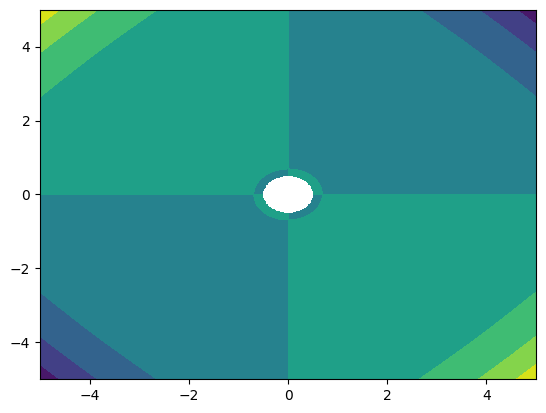

In [90]:
import matplotlib.pyplot as plt

plt.contourf(xg, yg, E00_num)
